# Exploratory Data Analysis (EDA)
I first did some basic research on the Iris dataset, and the code below shows the work that can be found online.  I then standardized and normalized the data and visualized it against the target outputs.  From these simple graphs we can see that this data does appear to be separable, particularly the features of sepal length and width.

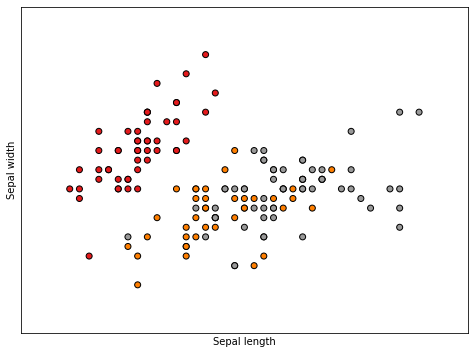

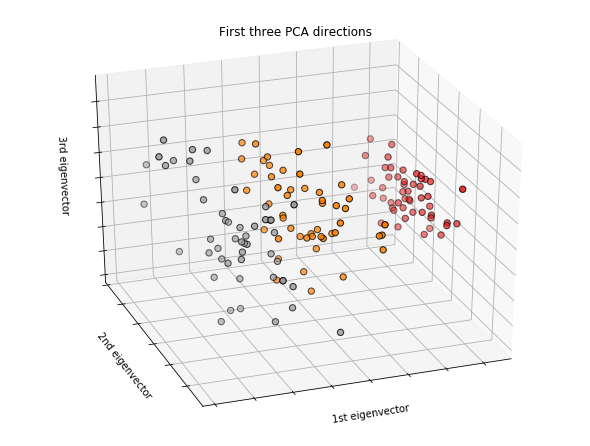

In [125]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [149]:
import numpy as np
samples = iris.data
targets = iris.target
nd = normalizeFeatureInput(samples)
sd = standardizeFeatureInput(samples)

In [152]:
def standardizeFeatureInput(samples):
    """
    parameters: 2D array containing samples
    return: array of identical shape ocntaining standardized values
    with a mean of 0 and stdev of 1
    """
    arr = np.array(samples)
    mean = arr.T.mean(axis=1)
    stdev = arr.T.std(axis=1)
    
    newArr = []
    for sample in arr:
        newArr.append((sample - mean) / stdev)
    
    return np.array(newArr)

def normalizeFeatureInput(samples):
    """
    parameters: 2D array containing samples
    return: array of identical shape conntaining normalized values
    between 0 and 1
    """
    arr = np.array(samples)
    minimum = np.amin(arr.T, axis = 1)
    maximum = np.amax(arr.T, axis = 1)
    
    newArr = []
    for sample in arr:
        newArr.append((sample - minimum) / (maximum - minimum))
    
    return np.array(newArr)

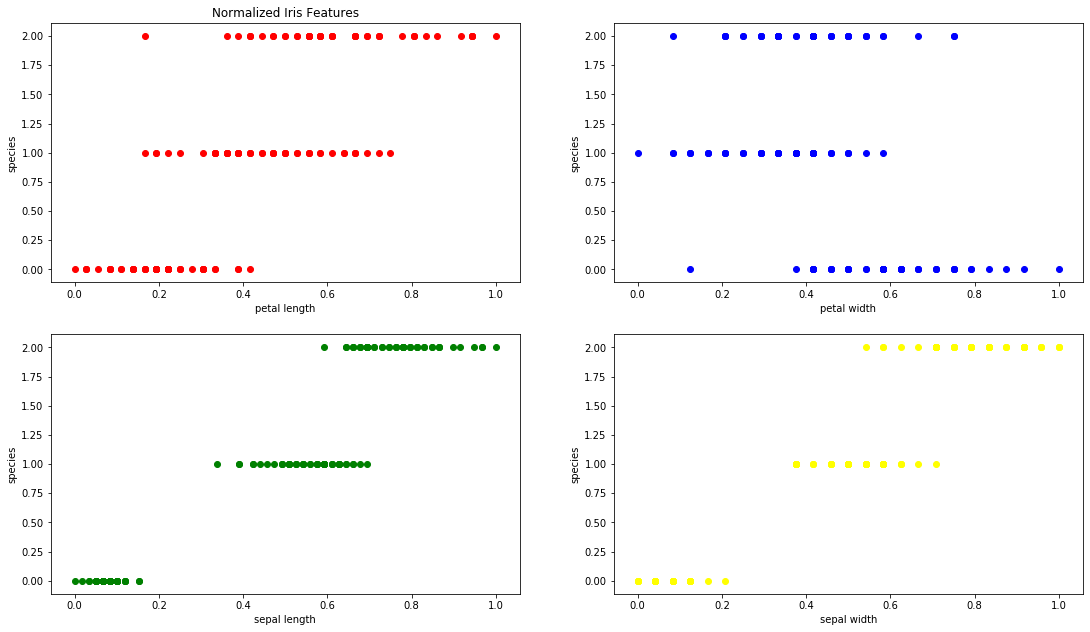

In [151]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


plt.subplot(221)
plt.title("Normalized Iris Features")
plt.scatter(nd.T[0], targets, c='red')
plt.ylabel("species")
plt.xlabel("petal length")

plt.subplot(222)
plt.scatter(nd.T[1],targets, c='blue')
plt.ylabel("species")
plt.xlabel("petal width")

plt.subplot(223)
plt.scatter(nd.T[2], targets, c="green")
plt.ylabel("species")
plt.xlabel("sepal length")

plt.subplot(224)
plt.scatter(nd.T[3], targets, c="yellow")
plt.ylabel("species")
plt.xlabel("sepal width")

plt.show()

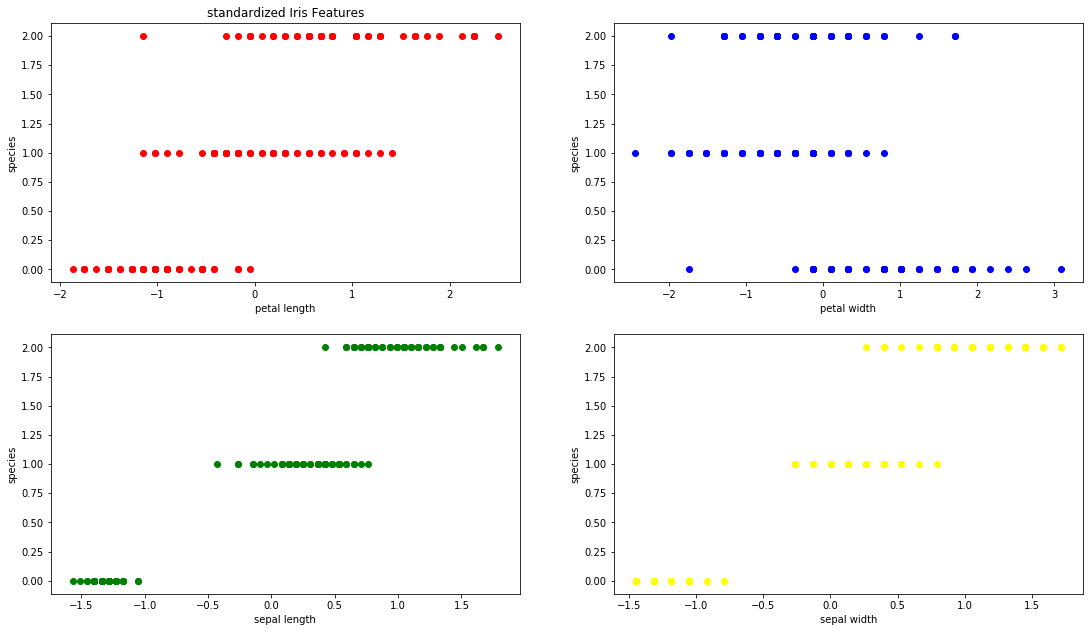

In [153]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


plt.subplot(221)
plt.title("standardized Iris Features")
plt.scatter(sd.T[0], targets, c='red')
plt.ylabel("species")
plt.xlabel("petal length")

plt.subplot(222)
plt.scatter(sd.T[1],targets, c='blue')
plt.ylabel("species")
plt.xlabel("petal width")

plt.subplot(223)
plt.scatter(sd.T[2], targets, c="green")
plt.ylabel("species")
plt.xlabel("sepal length")

plt.subplot(224)
plt.scatter(sd.T[3], targets, c="yellow")
plt.ylabel("species")
plt.xlabel("sepal width")

plt.show()